# <center> Basic Statistics Case Study </center>

In [2]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from datetime import datetime, timedelta, date

#### BUSINESS PROBLEM-1:

Lending Club is a peer-to-peer lending platform where members lend to each other, with anonymized loan and borrower data publicly accessible. 

##### Using Lending Club data, our team aims to test these hypotheses:

a. Interest rates vary with loan amounts, potentially favoring higher loan amounts.</br>
b. Loan durations directly impact interest rates.</br>
c. Interest rates fluctuate depending on the loan purpose.</br>
d. Investigating the relationship between FICO scores and home ownership, suggesting home owners may have higher scores.

<b>Data</b>: We have the <b><i>"LoansData.csv"</i></b> dataset, featuring the following variables (with data types and explanations):

- <b>Amount.Requested</b>: Numeric, representing the requested loan amount (in dollars).
- <b>Amount.Funded.By.Investors</b>: Numeric, indicating the amount funded by investors (in dollars).
- <b>Interest.rate</b>: Character, denoting the lending interest rate charged to the borrower.
- <b>Loan.length</b>: Character, specifying the loan duration in months.
- <b>Loan.Purpose</b>: Categorical, describing the purpose of the loan as stated by the applicant.
- <b>Debt.to.Income.Ratio</b>: Character, showing the percentage of the consumer's gross income dedicated to debt payments.
- <b>State</b>: Character, providing the U.S. state abbreviation of the applicant's residence.
- <b>Home.ownership</b>: Character, indicating whether the applicant owns, rents, or has a mortgage.
- <b>Monthly.income: Categorical, representing the monthly income of the applicant (in dollars).
- <b>FICO.range</b>: Categorical (expressed as a string label, e.g., "650-655"), indicating the applicant's FICO score range.
- <b>Open.CREDIT.Lines</b>: Numeric, displaying the number of open lines of credit at the time of application.
- <b>Revolving.CREDIT.Balance</b>: Numeric, showing the total outstanding balance across all credit lines.
- <b>Inquiries.in.the.Last.6.Months</b>: Numeric, indicating the number of credit inquiries made in the previous 6 months.
- <b>Employment.Length</b>: Character, detailing the length of time employed at the current job.

In [3]:
#Data Availability
LoanData=pd.read_csv("E:\\CS\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Python\\Basic Statistics - Hypothesis Testing\\LoansData.csv")

In [4]:
#Explonatory Data Analysis | Data Profiling | Data Inspection
LoanData.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [5]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [6]:
LoanData.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [7]:
LoanData.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [8]:
LoanData.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

In [9]:
LoanData.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount.Requested,2499.0,12405.462185,7802.933666,1000.00,6000.0,10000.0,17000.0,35000.0
Amount.Funded.By.Investors,2499.0,12002.374186,7746.767348,-0.01,6000.0,10000.0,16000.0,35000.0
Monthly.Income,2499.0,5688.931321,3963.118185,588.50,3500.0,5000.0,6800.0,102750.0
Open.CREDIT.Lines,2497.0,10.072887,4.507416,2.00,7.0,9.0,13.0,38.0
Revolving.CREDIT.Balance,2497.0,15223.184622,18281.015258,0.00,5584.0,10948.0,18861.0,270800.0
Inquiries.in.the.Last.6.Months,2497.0,0.906688,1.231149,0.00,0.0,0.0,1.0,9.0


In [10]:
# Data Prep | Data Cleaning | Data Munging | Data Wrangling
LoanData.rename(columns={'Amount.Requested':'Amount_Requested', 'Amount.Funded.By.Investors':'Amount_Funded_By_Investors', 'Interest.Rate':'Interest_Rate', 'Loan.Length':'Loan_Length', 'Loan.Purpose':'Loan_Purpose','Loan.Purchase':'Loan_Purchase', 'Debt.To.Income.Ratio':'Debt_To_Income_Ratio', 'Home.Ownership':'Home_Ownership', 'Monthly.Income':'Monthly_Income', 'FICO.Range':'FICO_Range', 'Open.CREDIT.Lines':'Open_CREDIT_Lines', 'Revolving.CREDIT.Balance':'Revoling_CREDIT_Balance', 'Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months', 'Employment.Length':'Employment_Length_In_Year'}, inplace=True)

In [11]:
LoanData.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revoling_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length_In_Year
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years


In [12]:
LoanData['Interest_Rate']=LoanData['Interest_Rate'].str.replace("%", '')
LoanData['Debt_To_Income_Ratio']=LoanData['Debt_To_Income_Ratio'].str.replace("%", '')
LoanData['Employment_Length_In_Year']=LoanData['Employment_Length_In_Year'].str.replace("years", '')
LoanData['Employment_Length_In_Year']=LoanData['Employment_Length_In_Year'].str.replace("year", '')
LoanData['Employment_Length_In_Year']=LoanData['Employment_Length_In_Year'].str.replace("<", '')

In [13]:
LoanData.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revoling_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length_In_Year
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2


In [14]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revoling_CREDIT_Balance         2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [15]:
LoanData.nunique()

Amount_Requested                   380
Amount_Funded_By_Investors         710
Interest_Rate                      275
Loan_Length                          2
Loan_Purpose                        14
Debt_To_Income_Ratio              1669
State                               46
Home_Ownership                       5
Monthly_Income                     632
FICO_Range                          38
Open_CREDIT_Lines                   29
Revoling_CREDIT_Balance           2349
Inquiries_in_the_Last_6_Months      10
Employment_Length_In_Year           11
dtype: int64

In [16]:
LoanData['Interest_Rate']=pd.to_numeric(LoanData.Interest_Rate)
LoanData['Debt_To_Income_Ratio']=pd.to_numeric(LoanData.Debt_To_Income_Ratio)

In [17]:
LoanData.Amount_Requested.fillna(LoanData.Amount_Requested.mean(), inplace=True)
LoanData.Amount_Funded_By_Investors.fillna(LoanData.Amount_Funded_By_Investors.mean(), inplace=True)
LoanData.Interest_Rate.fillna(LoanData.Interest_Rate.mean(), inplace=True)
LoanData.Debt_To_Income_Ratio.fillna(LoanData.Debt_To_Income_Ratio.mean(), inplace=True)
LoanData.Revoling_CREDIT_Balance.fillna(LoanData.Revoling_CREDIT_Balance.mean(), inplace=True)
LoanData.Monthly_Income.fillna(LoanData.Monthly_Income.mean(), inplace=True)

In [18]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   float64
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2500 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revoling_CREDIT_Balance         2500 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [19]:
LoanData.Home_Ownership.fillna(LoanData.Home_Ownership.value_counts().index[0], inplace=True)
LoanData.FICO_Range.fillna(LoanData.FICO_Range.value_counts().index[0], inplace=True)
LoanData.Open_CREDIT_Lines.fillna(LoanData.Open_CREDIT_Lines.value_counts().index[0], inplace=True)
LoanData.Inquiries_in_the_Last_6_Months.fillna(LoanData.Inquiries_in_the_Last_6_Months.value_counts().index[0], inplace=True)
LoanData.Loan_Length.fillna(LoanData.Loan_Length.value_counts().index[0], inplace=True)
LoanData.Employment_Length_In_Year.fillna(LoanData.Employment_Length_In_Year.value_counts().index[0], inplace=True)

In [20]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   float64
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2500 non-null   object 
 8   Monthly_Income                  2500 non-null   float64
 9   FICO_Range                      2500 non-null   object 
 10  Open_CREDIT_Lines               2500 non-null   float64
 11  Revoling_CREDIT_Balance         2500 non-null   float64
 12  Inquiries_in_the_Last_6_Months  25

In [21]:
LoanData['FICO_Score']=((LoanData.FICO_Range.str[0:3].astype(int))+(LoanData.FICO_Range.str[4:].astype(int)))/2

In [22]:
LoanData.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revoling_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length_In_Year,FICO_Score
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1,737.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2,717.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2,692.0
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5,697.0
4,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9,697.0


### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

In [23]:
LoanData.head(3)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revoling_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length_In_Year,FICO_Score
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1,737.0
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2,717.0
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2,692.0


###### Step 1 :Define Null Hypothesis H0: 
There is no relation between Interest Rate and Amount Funded By Investors

###### Step 2 :Define Alternate Hypothesis Ha: 
There is a relation between Interest Rate and Amount Funded by Investors

###### Step 3 :Define Confident Interval and P value: 
    CI= 95%
    Pvalue=0.05

###### Step 4 :Perform Test

In [24]:
statistic, p_value=stats.pearsonr(LoanData.Amount_Requested, LoanData.Interest_Rate)

In [25]:
statistic

0.33244640596656916

In [26]:
p_value

1.4148683739770683e-65

##### Step 5: Rejection Rule:

Near to weak direct relationship between interest rate and Loan amount

In [27]:
if p_value<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


##### Step 6: Business Conclusion:
There is a relation between Interest and Amount funded but very weak. With 95 percent confidence interval, we can say that Interest rate is varied for different loan amounts

### b. Loan length is directly effecting intrest rate

##### Step 1 :Define Null Hypothesis H0:
There is no relation between Interest rate and Loan length.

###### Step 2:Define Alternate Hypothesis Ha:
There is relation between Interest rate and Loan length.

##### Step 3:Define Confident Interval and pvalue:

    CI=95%
    p value=0.05

##### Step 4: Perform Test

In [28]:
LoanData.Loan_Length.value_counts()

36 months    1952
60 months     548
Name: Loan_Length, dtype: int64

In [29]:
interest='Interest_Rate'
Loan_length_36_months=LoanData.loc[LoanData.Loan_Length =='36 months', interest]
Loan_length_60_months=LoanData.loc[LoanData.Loan_Length =='60 months', interest]

In [30]:
t_score, p_value=stats.ttest_ind(Loan_length_60_months, Loan_length_36_months)

In [31]:
print("t_score is: ", t_score)
print("pvalue is :", p_value)

t_score is:  23.41049023613487
pvalue is : 9.549596064332559e-110


##### Step 5: Rejection Rule

In [32]:
if p_value<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject to Null Hypothesis")

We reject Null Hypothesis


##### Step 6: Business Conclusion
There is relation between Interest rate and Loan length. Loan length iThe relation is between weak to intermediate.

### c. Interest rate varies for different purpose of loans

In [33]:
LoanData.Loan_Purpose.nunique()

14

In [34]:
LoanData.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [35]:
###### Segregating the data on the basis of segments:

usage = 'Interest_Rate'

debt_consolidation_usage = LoanData.loc[LoanData.Loan_Purpose == 'debt_consolidation' , usage]
credit_card_usage = LoanData.loc[LoanData.Loan_Purpose == 'credit_card', usage]
other_usage = LoanData.loc[LoanData.Loan_Purpose == 'other', usage]
home_improvement_usage = LoanData.loc[LoanData.Loan_Purpose == 'home_improvement', usage]
major_purchase_usage = LoanData.loc[LoanData.Loan_Purpose == 'major_purchase', usage]
small_business_usage = LoanData.loc[LoanData.Loan_Purpose == 'small_business', usage]
car_usage = LoanData.loc[LoanData.Loan_Purpose == 'car', usage]
wedding_usage = LoanData.loc[LoanData.Loan_Purpose == 'wedding', usage]
medical_usage = LoanData.loc[LoanData.Loan_Purpose == 'medical', usage]
moving_usage = LoanData.loc[LoanData.Loan_Purpose == 'moving', usage]
vacation_usage = LoanData.loc[LoanData.Loan_Purpose == 'vacation', usage]
house_usage = LoanData.loc[LoanData.Loan_Purpose == 'house', usage]
educational_usage = LoanData.loc[LoanData.Loan_Purpose == 'educational', usage]
renewable_energy_usage = LoanData.loc[LoanData.Loan_Purpose == 'renewable_energy', usage]


print("Mean of debt_consolidation_usage = ", debt_consolidation_usage.mean())
print("Mean of credit_card_usage = ", credit_card_usage.mean())
print("Mean of other_usage = ", other_usage.mean())
print("Mean of home_improvement_usage = ", home_improvement_usage.mean())
print("Mean of major_purchase_usage = ", major_purchase_usage.mean())
print("Mean of small_business_usage = ", small_business_usage.mean())
print("Mean of car_usage = ", car_usage.mean())
print("Mean of wedding_usage = ", wedding_usage.mean())
print("Mean of medical_usage = ", medical_usage.mean())
print("Mean of moving_usage = ", moving_usage.mean())
print("Mean of vacation_usage = ", vacation_usage.mean())
print("Mean of house_usage = ", house_usage.mean())
print("Mean of educational_usage = ", educational_usage.mean())
print("Mean of renewable_energy_usage = ", renewable_energy_usage.mean())

Mean of debt_consolidation_usage =  13.58691660290742
Mean of credit_card_usage =  13.05068781151047
Mean of other_usage =  13.15955223880597
Mean of home_improvement_usage =  11.594276315789473
Mean of major_purchase_usage =  10.797821782178216
Mean of small_business_usage =  12.83919540229885
Mean of car_usage =  11.113000000000001
Mean of wedding_usage =  12.073215084888425
Mean of medical_usage =  11.649666666666667
Mean of moving_usage =  13.621034482758622
Mean of vacation_usage =  11.966190476190476
Mean of house_usage =  13.447999999999999
Mean of educational_usage =  11.007333333333332
Mean of renewable_energy_usage =  9.8775


##### Step 1 :Define Null Hypothesis H0:

All the sample means are from the same population

##### Step 2 :Define Alternate Hypothesis Ha:

All the sample means are from the different population

##### Step 3 :Define Confidence Interval and pvalue

    CI=95%
    pvalue=0.05

##### Step 4: Perform Test

In [36]:
f_score, p_value=stats.f_oneway(debt_consolidation_usage, credit_card_usage, other_usage, home_improvement_usage, major_purchase_usage, small_business_usage, car_usage, wedding_usage, medical_usage, moving_usage, vacation_usage, house_usage, educational_usage, renewable_energy_usage)
print("f_score is: {} and pvalue is: {}".format(f_score, p_value))

f_score is: 7.482638784097436 and pvalue is: 1.1599665535989115e-14


##### Step 5: Rejectino Rule

In [37]:
if p_value<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


##### Step 6: Business conclusion

Different Loan purpose have different Interest Rate. With 95 percent confidence interval,we can say that Interest rate varies for different purpose of loans.

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


##### Step 1: Define Null Hypothesis H0:

FICO scores and Home Ownership are independent

##### Step 2: Define Alternate Hypothesis Ha:

FICO scores and Home Ownership are dependent

##### Step 3: Define Confident Interval and pvalue:
    CI=95%
    pvalue=0.05

##### Step 4: Perform Test

In [38]:
LoanData.Home_Ownership.value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [39]:
FICO_Score='FICO_Score'

MORTGAGE=LoanData.loc[LoanData.Home_Ownership=='MORTGAGE', FICO_Score]
RENT=LoanData.loc[LoanData.Home_Ownership=='RENT', FICO_Score]
OWN=LoanData.loc[LoanData.Home_Ownership=='OWN', FICO_Score]  
OTHER=LoanData.loc[LoanData.Home_Ownership=='OTHER',FICO_Score]

In [40]:
stats.f_oneway(MORTGAGE, RENT, OWN, OTHER)

F_onewayResult(statistic=23.29739165105827, pvalue=7.180580645216916e-15)

##### Step 5: Rejection Rule

In [41]:
if p_value<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


###### Business Conclusion:

There is relationship between FICO scores and Home Ownership. FICO Score and Home Onwership are dependent

### Business Problem 2: 

Background: In a small manufacturing company, each customer order requires a unique price quote, making the pricing process intricate and dependent on various factors. Concerned about complexity and potential price variability, the sales department manager initiated an improvement study. The team investigated whether pricing experts Mary and Barry, who independently provided quotes for twelve randomly selected orders, exhibit statistically significant differences in their average price quotes.

#### Data: 

The data set "Price_Quotes.csv" contains the order number, 1 through 12, and the price quotes by Mary 
and Barry for each order. Each row in the data set is the same order. Thus, Mary and 
Barry produced quotes for the same orders.

In [42]:
# Requirements Gathering and understanding business: If there is any difference in the average price quotes provided by Mary and Barry

In [43]:
#Data Availability
price_qoutes=pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Python\Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

In [44]:
price_qoutes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [45]:
#EDA

price_qoutes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [46]:
price_qoutes.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_Number,12.0,6.500000,3.605551,1.0,3.75,6.5,9.25,12.0
Barry_Price,12.0,124.333333,20.698412,94.0,106.75,131.0,140.50,152.0
Mary_Price,12.0,114.750000,11.054616,97.0,107.00,114.0,121.00,133.0


In [47]:
price_qoutes.nunique()

Order_Number    12
Barry_Price     12
Mary_Price      11
dtype: int64

In [48]:
#Hypothesis Testing to know if there is any difference in the average price quotes provided by Mary and Barry

##### STEP 1: Define Null Hypothesis H0:
        
        The average price provded by Barry and Mary are same or u1=u2

##### STEP 2: Define Alternate Hypothesis H0:

    The average price provded by Barry and Mary are different or u1=u2

##### STEP 3: Define Confident Interval and pvalue

    CI=95%
    pvalue=0.05

##### STEP 4: Perform Test:

where we have  2 samples to compare, from same object: "order" 

In [49]:
t_score, p_value=stats.ttest_rel(price_qoutes.Barry_Price, price_qoutes.Mary_Price)
print("t score is: ", t_score)
print("p_value is: ", p_value)

t score is:  2.5213765108923494
p_value is:  0.02840588045242053


##### STEP 5: Rejection Rule:

In [50]:
if p_value<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


##### STEP 6: Business Conclusion:

The average price provided by Barry and Mary for same orders are different.

### Business Problem 3:

New Life Residential Treatment Facility serves troubled teenagers from psychiatric hospitals, often facing behavior issues due to past trauma and legal involvement. High employee turnover, driven by low wages, prompted a reengineering program. Changes included shorter shifts, staff involvement, increased budgets, performance evaluations, and higher behavior standards. Our aim is to assess if these changes effectively reduced behavioral problems and staff turnover, focusing on the critical incident rate, including unauthorized departures, property damage, drug use, assaults, and temporary relocations, seeking evidence of improvements post-reengineering.

<b>Data</b>: The dataset <b><i>"Price_Quotes.csv"</i></b> spans 20 months, with the first 13 months occurring before the reengineering phase. It includes the following variables:

<b>Reengineer</b>: Indicates whether the month falls before (Prior) or after (Post) the reengineering.</br>
<b>EmployeeTurnover</b>: Represents the percentage of employees who resigned during a given month, relative to the total number of employees.</br>
<b>TRFF(%)</b>: Denotes the percentage of residents temporarily removed from the facility, relative to the total number of residents.</br>
<b>CI (%)</b>: Reflects the percentage of critical incident reports filed in that month, relative to the total number of residents.</br>

In [51]:
treatment_facilty=pd.read_csv("E:\\CS\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Python\\Basic Statistics - Hypothesis Testing\\Treatment_Facility.csv")

In [52]:
treatment_facilty

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [53]:
treatment_facilty.rename(columns={'VAR4':'TRFF', 'VAR5':'CI'}, inplace=True)

In [54]:
treatment_facilty.head(5)

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [55]:
treatment_facilty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF               20 non-null     float64
 4   CI                 20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [56]:
treatment_facilty.nunique()

Month                20
Reengineer            2
Employee_Turnover    19
TRFF                 19
CI                   20
dtype: int64

Business Problem: 

    -- Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. 
       i.e To determine if the reengineering effort changed the critical incidence rate. 
       
    -- Is there evidence that the critical incidence rate improved

##### 1: Checking what effect, if any, the reengineering effort had on the staff turnover

In [57]:
treatment_facilty.head(3)

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830


In [58]:
# STEP 1: Define Null Hypothesis H0:
        #Reengineering has no effect on Employee turnover or u1=u2
# STEP 2: Define Alternate Hypothesis Ha:
        #Reengineering has effect on Employee turnover, and what effect u1!=u2
# STEP 3: Define Confident Interval and pvalue:
        # cI=95% (1.960)
        # pvalue=0.05
# STEP 4: Perform Testing

In [59]:
emp_turnover='Employee_Turnover'

emp_turnover_prior=treatment_facilty.loc[treatment_facilty.Reengineer=='Prior', emp_turnover]
emp_turnover_post=treatment_facilty.loc[treatment_facilty.Reengineer=='Post', emp_turnover]

In [60]:
t_score, pvalue=stats.ttest_ind(emp_turnover_prior, emp_turnover_post)

In [61]:
print("The t_score is: ", t_score)
print("The the pvalue is: ", pvalue)

The t_score is:  -1.770306704753604
The the pvalue is:  0.09361109345535304


In [62]:
#STEP 5: Rejection Rule

if pvalue<0.05:
    print("We reject Null hypothesis")
else:
    print("We fail to reject to Null Hypothesis")

We fail to reject to Null Hypothesis


In [63]:
#STEP 6 Business Conclusion: We cannot say that Reengineering has effect on Employee turnover

##### 2.If the reengineering effort changed the critical incidence rate.

In [64]:
# STEP 1: Define Null Hypothesis H0:
        #Reengineering has no effect on critical incidence or u1=u2
# STEP 2: Define Alternate Hypothesis Ha:
        #Reengineering has effect on critical incidence, and what effect u1!=u2
# STEP 3: Define Confident Interval and pvalue:
        # cI=95% (1.960)
        # pvalue=0.05
# STEP 4: Perform Testing

In [65]:
critical_incidence='CI'

critical_incidence_prior=treatment_facilty.loc[treatment_facilty.Reengineer=='Prior', critical_incidence]
critical_incidence_post=treatment_facilty.loc[treatment_facilty.Reengineer=='Post', critical_incidence]

In [66]:
t_score, pvalue=stats.ttest_ind(critical_incidence_prior, critical_incidence_post)

In [67]:
print("The t_score is: ", t_score)
print("The the pvalue is: ", pvalue)

The t_score is:  1.627914425352865
The the pvalue is:  0.12091989189884148


In [68]:
#STEP 5: Rejection Rule

if pvalue<0.05:
    print("We reject Null hypothesis")
else:
    print("We fail to reject to Null Hypothesis")

We fail to reject to Null Hypothesis


In [69]:
#STEP 6 Business Conclusion: We cannot say that Reengineering has effect on critical Incidence

## Business Problem 4:

In software development, projects typically encompass six phases, from requirements to maintenance. ApDudes, specializing in tablet app development, faced challenges meeting project deadlines and budgets. Their project manager identified issues in the implementation phase, where software engineers grappled with prioritization and project size. To address this, projects were divided into smaller tasks with assigned priorities. Our primary focus is on evaluating the effectiveness of this prioritization system. If it proves successful, high-priority tasks should be completed faster than medium-priority ones, and medium-priority tasks should outpace low-priority ones. We will analyze the data to determine if this prioritization hierarchy holds true in practice.

<b>Data</b>:

Priority_Assessment.csv
    
The data set contains a random sample of 642 jobs completed over the lastsix months. The variables in the data set are:
Days The number of days it took to complete the job
Priority The priority level assigned to that job


In [71]:
priority_assessment=pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Python\Basic Statistics - Hypothesis Testing\\Priority_Assessment.csv")

In [72]:
priority_assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [73]:
priority_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [74]:
priority_assessment.nunique()

Days        121
Priority      3
dtype: int64

In [75]:
priority_assessment.isnull().sum()

Days        0
Priority    0
dtype: int64

##### STEP 1: Define Null hypothesis H0: Tasks not completed based on priority. u1=u2=u3

##### STEP 2: Define Null hypothesis H0: Tasks completed based on priority. u1!=u2!=u3

##### STEP 3: Define Null hypothesis H0: Define Confident interval and pvalue.

        CI=95%
        pvalue=0.05

##### STEP 4: Perform Test:

In [76]:
days='Days'

low_priority=priority_assessment.loc[priority_assessment.Priority=='Low', days]
medium_priority=priority_assessment.loc[priority_assessment.Priority=='Medium', days]
high_priority=priority_assessment.loc[priority_assessment.Priority=='High', days]

In [77]:
f_score, pvalue=stats.f_oneway(low_priority, medium_priority, high_priority)
print("f_Score is : {}, and pvalue is: {}".format(f_score, pvalue))

f_Score is : 1.8123110100760724, and pvalue is: 0.16411459461716182


##### STEP 5: Rejection Rule

In [78]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We fail to reject Null Hypothesis


##### STEP 6: Business Conclusion: 
We cannot say that that high priority jobs are completed more quickly than medium priority jobs, and medium priority jobs are completed more quickly than low priority jobs with the help of this data. 

## Business Problem 5:

Film on the Rocks is a summer movie series held at Colorado's renowned Red Rocks Amphitheatre. It features classic films and live entertainment, backed by corporate sponsors. While Red Rocks offers a unique experience, accessibility and weather can be issues. The promoters aim to enhance attendance and sponsorships, so they conducted surveys to understand their audience and improve marketing.

<b>Business Problem</b>: Use the survey resultsto addressthe following questions
- What isthe overall level of customer satisfaction?
- What factors are linked to satisfaction?
- What is the demographic profile of Film on the Rocks patrons?
- In what media outlet(s) should the film series be advertised?

<b>Data</b>: The data set <b><i>"Films.csv"</i></b> contains 330 surveys collected during three Film on the Rocks movies:
Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory.

In [79]:
films_data=pd.read_csv("E:\\CS\DS360\\DS360-20230716T150307Z-001\\DS360\\Data Science 360\\Data Science 360\\Python\\Basic Statistics - Hypothesis Testing\\films.csv")

In [80]:
films_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [81]:
films_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [82]:
films_data.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [83]:
films_data.nunique()

_rowstate_         1
Movie              3
Gender             4
Marital_Status     5
Sinage             5
Parking            5
Clean              5
Overall            5
Age                4
Income             3
Hear_About        11
dtype: int64

In [84]:
films_data.Marital_Status.fillna(films_data.Marital_Status.value_counts().index[0], inplace=True)
films_data.Sinage.fillna(films_data.Sinage.value_counts().index[0], inplace=True)
films_data.Parking.fillna(films_data.Parking.value_counts().index[0], inplace=True)
films_data.Clean.fillna(films_data.Clean.value_counts().index[0], inplace=True)
films_data.Overall.fillna(films_data.Overall.value_counts().index[0], inplace=True)
films_data.Age.fillna(films_data.Age.value_counts().index[0], inplace=True)
films_data.Income.fillna(films_data.Income.value_counts().index[0], inplace=True)
films_data.Hear_About.fillna(films_data.Hear_About.value_counts().index[0], inplace=True)

In [85]:
films_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  330 non-null    object 
 4   Sinage          330 non-null    float64
 5   Parking         330 non-null    float64
 6   Clean           330 non-null    float64
 7   Overall         330 non-null    float64
 8   Age             330 non-null    float64
 9   Income          330 non-null    float64
 10  Hear_About      330 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [86]:
films_data.drop(columns='_rowstate_', inplace=True)

In [87]:
films_data.head(3)

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5


In [88]:
#Data Prep

films_data.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [89]:
films_data.Gender=np.where((films_data.Gender == 'Male') | (films_data.Gender == '1'),"Male","Female")

In [90]:
films_data.Marital_Status=np.where((films_data.Marital_Status=='1') | (films_data.Marital_Status=='Married') ,"Married","Single" )

In [91]:
films_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           330 non-null    object 
 1   Gender          330 non-null    object 
 2   Marital_Status  330 non-null    object 
 3   Sinage          330 non-null    float64
 4   Parking         330 non-null    float64
 5   Clean           330 non-null    float64
 6   Overall         330 non-null    float64
 7   Age             330 non-null    float64
 8   Income          330 non-null    float64
 9   Hear_About      330 non-null    object 
dtypes: float64(6), object(4)
memory usage: 25.9+ KB


In [92]:
films_data.head(3)

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5


In [93]:
for i in films_data.columns:
    films_data[i]=films_data[i].fillna(films_data[i].mode()[0]) 

In [94]:
films_data.isna().sum()

Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [95]:
# 1. What is the overall level of customer satisfaction?

In [96]:
mean=films_data.Overall.mean()

In [97]:
std=films_data.Overall.std()

In [98]:
SE=std/(np.sqrt(films_data.shape[0]))

In [99]:
range1=mean-(1.96*SE)
range2=mean+(1.96*SE)

In [100]:
print("With 95% of confidence interval, the overall level of customer satisfaction range between {} and {} ".format(range1, range2))

With 95% of confidence interval, the overall level of customer satisfaction range between 1.5469994901816928 and 1.6954247522425494 


In [101]:
#2. What factors are linked to satisfaction?

In [102]:
films_data.head(3)

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5


In [103]:
#Factor 1: Movie

In [104]:
films_data.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [105]:
overall='Overall'

Willy_Wonka=films_data.loc[films_data.Movie=='Willy Wonka', overall]
Ferris_Buellers=films_data.loc[films_data.Movie=='Ferris Buellers Day Off', overall]
Old_School=films_data.loc[films_data.Movie=='Old School', overall]

In [106]:
f_score, pvalue=stats.f_oneway(Willy_Wonka, Ferris_Buellers, Old_School)

In [107]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We fail to reject Null Hypothesis


In [108]:
print("With 95 percent confidence interval, we cannot say that Movie is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, we cannot say that Movie is a factor linked to satisfaction with this data.


In [109]:
#Factor 2: Gender

In [110]:
films_data.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [111]:
overall='Overall'

Female=films_data.loc[films_data.Gender=='Female', overall]
Male=films_data.loc[films_data.Gender=='Male', overall]

In [112]:
t_score, pvalue=stats.ttest_ind(Female, Male)
print("The t_score is: {} and pvalue is:{}".format(t_score, pvalue))

The t_score is: -1.393621669674226 and pvalue is:0.16437541932112798


In [113]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We fail to reject Null Hypothesis


In [114]:
print("With 95 percent confidence interval, we cannot say that Gender is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, we cannot say that Gender is a factor linked to satisfaction with this data.


In [115]:
#Factor 3: Marital_Status

In [116]:
films_data.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [117]:
overall='Overall'

Single=films_data.loc[films_data.Marital_Status=='Single', overall]
Married=films_data.loc[films_data.Marital_Status=='Married', overall]

In [118]:
t_score, pvalue=stats.ttest_ind(Single, Married)
print("The t_score is: {} and pvalue is:{}".format(t_score, pvalue))

The t_score is: 0.7171640309514444 and pvalue is:0.47378328196635067


In [119]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We fail to reject Null Hypothesis


In [120]:
print("With 95 percent confidence interval, we cannot say that Marital Status is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, we cannot say that Marital Status is a factor linked to satisfaction with this data.


In [121]:
#Factor 4: Sinage

In [122]:
films_data.Sinage.value_counts()

2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [123]:
PearsonR_score, pvalue=stats.pearsonr(films_data.Sinage, films_data.Overall)

In [124]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


In [125]:
print("With 95 percent confidence interval, Sinage is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, Sinage is a factor linked to satisfaction with this data.


In [126]:
#Factor 5: Parking

In [127]:
films_data.Parking.value_counts()

2.0    155
1.0    135
3.0     29
4.0      7
5.0      4
Name: Parking, dtype: int64

In [128]:
PearsonR_score, pvalue=stats.pearsonr(films_data.Parking, films_data.Overall)

In [129]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


In [130]:
print("With 95 percent confidence interval, Parking is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, Parking is a factor linked to satisfaction with this data.


In [131]:
#Factor 6: Clean

In [132]:
films_data.Clean.value_counts()

2.0    155
1.0    144
3.0     24
4.0      5
5.0      2
Name: Clean, dtype: int64

In [133]:
PearsonR_score, pvalue=stats.pearsonr(films_data.Clean, films_data.Overall)

In [134]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


In [135]:
print("With 95 percent confidence interval, Clean is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, Clean is a factor linked to satisfaction with this data.


In [136]:
#Factor 7: Age

In [137]:
films_data.Age.value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [138]:
overall='Overall'

s1=films_data.loc[films_data.Age==1., overall]
s2=films_data.loc[films_data.Age==2, overall]
s3=films_data.loc[films_data.Age==3, overall]
s4=films_data.loc[films_data.Age==4, overall]

In [139]:
stats.f_oneway(s1,s2,s3,s4)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

In [140]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


In [141]:
print("With 95 percent confidence interval, we cannot say Age is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, we cannot say Age is a factor linked to satisfaction with this data.


In [142]:
#Factor 8: Income

In [143]:
films_data.Income.value_counts()

1.0    158
3.0     90
2.0     82
Name: Income, dtype: int64

In [144]:
income1=films_data.loc[films_data.Income==1, overall]
income2=films_data.loc[films_data.Income==2, overall]
income3=films_data.loc[films_data.Income==3, overall]

In [145]:
f_Score, pvalue=stats.f_oneway(income1,income2,income3)

In [146]:
if pvalue<0.05:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We fail to reject Null Hypothesis


In [147]:
print("With 95 percent confidence interval, we cannot say Income is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, we cannot say Income is a factor linked to satisfaction with this data.


In [148]:
#Factor 8: Hear_About

In [149]:

films_data.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [150]:
Overall='Overall'

Hear_About_1=films_data.loc[films_data.Hear_About=="1", Overall]
Hear_About_2=films_data.loc[films_data.Hear_About=="2", Overall]
Hear_About_3=films_data.loc[films_data.Hear_About=="3", Overall]
Hear_About_4=films_data.loc[films_data.Hear_About=="4", Overall]
Hear_About_5=films_data.loc[films_data.Hear_About=="5", Overall]
Hear_About_2_5=films_data.loc[films_data.Hear_About=="2,5", Overall]
Hear_About_3_4=films_data.loc[films_data.Hear_About=="3,4", Overall]
Hear_About_4_5=films_data.loc[films_data.Hear_About=="4,5", Overall]
Hear_About_1_5=films_data.loc[films_data.Hear_About=="1,5", Overall]
Hear_About_5_4=films_data.loc[films_data.Hear_About=="5,4", Overall]
Hear_About_3_5=films_data.loc[films_data.Hear_About=="3,5", Overall]

In [151]:
f_score, pvalue=stats.f_oneway(Hear_About_5,Hear_About_4,Hear_About_3,Hear_About_2,Hear_About_1,Hear_About_2_5,Hear_About_3_4,Hear_About_4_5,Hear_About_1_5,Hear_About_5_4,Hear_About_3_5)

In [152]:
print("With 95 percent confidence interval, we cannot say Hear About is a factor linked to satisfaction with this data.")

With 95 percent confidence interval, we cannot say Hear About is a factor linked to satisfaction with this data.


In [153]:
# 3. What is the demographic profile of Film on the Rocks patrons?

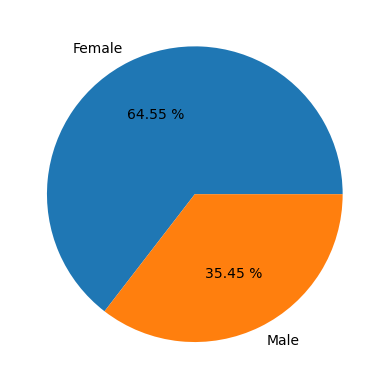

In [154]:
gender_demographic=(((films_data.Gender.value_counts())/(films_data.shape[0])*100)).reset_index().set_index('index')
plt.pie(gender_demographic.Gender,labels=gender_demographic.index,autopct='%0.2f %%')
plt.show()

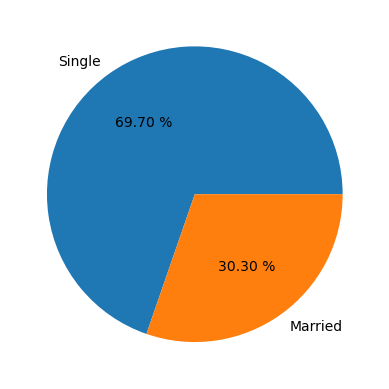

In [155]:
mstatus=(((films_data.Marital_Status.value_counts())/(films_data.shape[0])*100)).reset_index().set_index('index')
plt.pie(mstatus.Marital_Status,labels=mstatus.index,autopct='%0.2f %%')
plt.show()

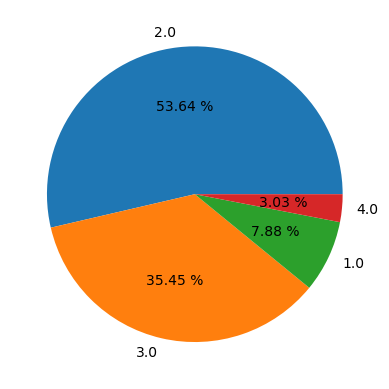

In [156]:
Age_demographic=(((films_data.Age.value_counts())/(films_data.shape[0])*100)).reset_index().set_index('index')
plt.pie(Age_demographic.Age,labels=Age_demographic.index,autopct='%0.2f %%')
plt.show()

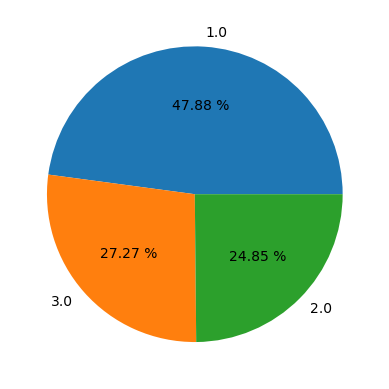

In [157]:
Income_demographic=(((films_data.Income.value_counts())/(films_data.shape[0])*100)).reset_index().set_index('index')
plt.pie(Income_demographic.Income,labels=Income_demographic.index,autopct='%0.2f %%')
plt.show()

In [158]:
#4. In what media outlet(s) should the film series be advertised?

In [159]:
films_data.Hear_About.value_counts().reset_index().iloc[0, 0]

'5'

In [160]:
print("The media outlet should the films series be advertised most: Word of Mouth")

The media outlet should the films series be advertised most: Word of Mouth
